# Decision trees
- Figuring out the answer by asking yes or no questions
- This is like a game of 20 questions
- Suppose I have a celebrity in mind
- You are allowed to ask me a set of questions
- I will only answer yes or no
- Based on my answer you will narrow down an answer
- Let's try it!!

In [22]:
# Import Datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time
# Direct data access from yahoo
import pandas_datareader.data as web

In [23]:
# Extract Predictors 
Predictors=web.DataReader(["T10Y2Y", "UNRATE", "CBIC1", "PERMIT","USSTHPI", "SLRTTO01USQ661S"], "fred", "1976-01-01", "2018-12-31")
# Take mean of the predictors every quarter
Predictors_1=Predictors.resample('QS').mean()
Predictors_1.columns=["YIELD","UNRATE","C_INV", "PERMIT","HOUSE","RETAIL"]
# Need annual precentage change in house prices and retail sales 
Predictors_1["C_HOUSE"]=Predictors_1["HOUSE"]/Predictors_1["HOUSE"].shift(4)-1
Predictors_1["C_RETIAL"]=Predictors_1["RETAIL"]/Predictors_1["RETAIL"].shift(4)-1
#Drop house and retail
Predictors_2=Predictors_1.drop(["HOUSE","RETAIL"],axis=1).dropna()
# Get Recession dates
Recession=web.DataReader(["USRECQ"],"fred","1977-01-01","2018-04-30")
# Construct X and y
X=Predictors_2.shift(1).dropna()
y=Recession["USRECQ"]
y=y[y.index>"1977-01-01"]
X,y

(               YIELD    UNRATE   C_INV       PERMIT   C_HOUSE  C_RETIAL
 DATE                                                                   
 1977-04-01  1.332222  7.500000  34.343  1562.000000  0.103816  0.037939
 1977-07-01  1.248254  7.133333  51.245  1693.333333  0.110466  0.032931
 1977-10-01  0.814762  6.900000  89.947  1713.666667  0.117302  0.034861
 1978-01-01  0.454833  6.666667  47.311  1761.000000  0.147334  0.038371
 1978-04-01  0.466393  6.333333  56.354  1758.333333  0.146190  0.016099
 ...              ...       ...     ...          ...       ...       ...
 2017-04-01  1.202258  4.566667 -18.876  1281.333333  0.055365  0.023672
 2017-07-01  0.963333  4.366667   0.637  1263.333333  0.060459  0.022948
 2017-10-01  0.878730  4.300000  56.087  1277.000000  0.058800  0.024696
 2018-01-01  0.677097  4.133333  25.302  1316.666667  0.059259  0.037249
 2018-04-01  0.598033  4.066667  47.267  1370.666667  0.065667  0.024168
 
 [165 rows x 6 columns], DATE
 1977-04-01    0
 1

Text(0, 0.5, 'C_RETIAL')

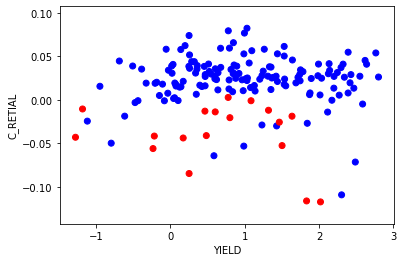

In [24]:
# Plot the values of yield and change in retail sales
# Highlight recessions as red dots
# Expansions as blue
c=np.array(["k"]*len(y))
for i in range(len(y)):
    if y[i]==1:
        c[i]="r"
    else:
        c[i]="b"
plt.scatter(X["YIELD"],X["C_RETIAL"],color=c)
plt.xlabel("YIELD")
plt.ylabel("C_RETIAL")

- Can you think of yes or no questions 
- that help you separate recessions 

In [70]:
# Split the data into testing and training datasets 
from sklearn.model_selection import train_test_split
# Splitting 20% as test and 80% as training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [49]:
# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Create an instance
model=DecisionTreeClassifier()
# fit the model
model.fit(X_train,y_train)
# Predictions
model.predict(X_train)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
# Check Training Performance
model.score(X_train,y_train)

1.0

- That is a perfect score. No error whatsoever in training data
- What does it do?

In [35]:
# Visualize the tree
# Import export_graphviz
from sklearn.tree import export_graphviz
# build
export_graphviz(model, out_file="tree.dot", class_names=["Expansion","Recession"], feature_names=X.columns, impurity=False, filled=True)

- To visualize we need to import graphviz package
- Go to Anaconda Prompt and type <br>
conda install python-graphviz
- Alternatively you can try typing it in the Jupyter Notebook Cell

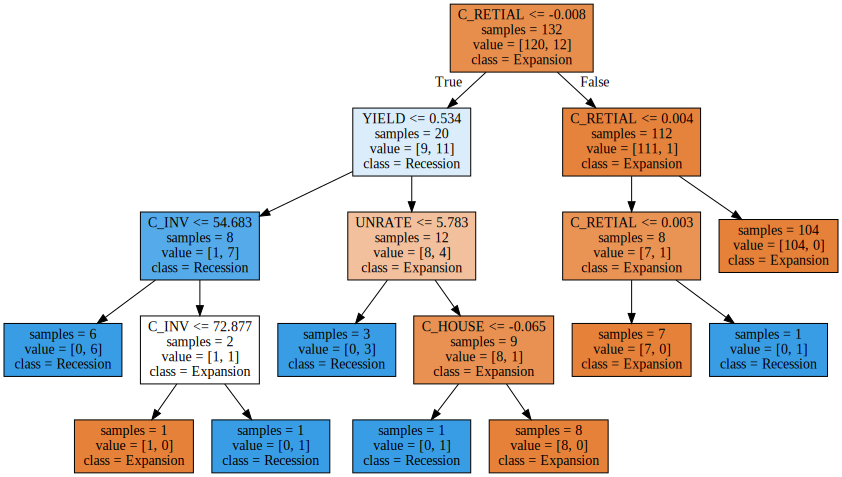

In [36]:
# Show
import graphviz

with open("tree.dot") as file:
    decision_tree=file.read()
graphviz.Source(decision_tree)

([<matplotlib.axis.YTick at 0x1d70c3ad5f8>,
 <a list of 6 Text yticklabel objects>)

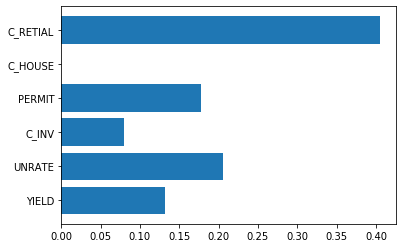

In [50]:
# Feature Importance
plt.barh(range(len(X_train.columns)),model.feature_importances_)
plt.yticks(range(len(X_train.columns)),X_train.columns)

In [38]:
# Check Testing Performance
model.score(X_test,y_test)

0.8484848484848485

- We can reduce overfitting by setting limit on
    - Maximum Depth of the tree
    - Maximum Number of leaves 

In [56]:
# Set Maximum depth to 3
model=DecisionTreeClassifier(max_depth=6)
# fit the model
model.fit(X_train,y_train)
# Training and testing accurace
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.9285714285714286)

# Random Forests
- Ensembles
    - Methods that combine multiple machine learning models to create powerful models

- The problem with decision trees is that they tend to overfit training data
- Random Forests
    - Collection of decision trees
    - Each tree might overfit data
    - By building many trees and averaging them reduce overfitting
- How to randomize trees
    - Selecting data points
    - selecting features
- Process
    - We can sample the training data multiple times
    - In each node, instead of looking at best features
        - The algorithm randomly sample features
        - Looks for best features in the subset
    - This way all the trees in the forest can be different
    - We can choose a maximum limit on the features that is being used
        - If we choose low number of features, each tree will be different but not deep
        - if we choose high number of features, trees will be similar but will be able to fit the data well
    - Prediction
        - Each tree will provide a probability
        - Average of all trees' probability is taken and prediction is made 
        
    


In [73]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier
# n_estimators says how many trees I want
model=RandomForestClassifier(n_estimators=10,random_state=100)
# fit the model
model.fit(X_train,y_train)
# Training and testing accurace
model.score(X_train,y_train),model.score(X_test,y_test)

(0.9924242424242424, 0.8484848484848485)

([<matplotlib.axis.YTick at 0x1d70c4bc048>,
 <a list of 6 Text yticklabel objects>)

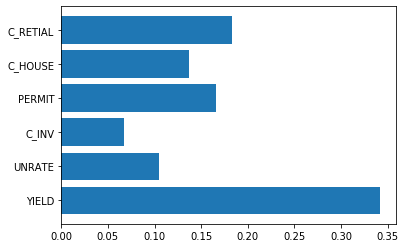

In [69]:
# Feature Importance
plt.barh(range(len(X_train.columns)),model.feature_importances_)
plt.yticks(range(len(X_train.columns)),X_train.columns)

# Gradient Boosting
- Ensemble method
- Build trees in serial manner
    - Each tree tries to correct mistakes of the previous one
    - Shallow trees with depth of 1-5
    - Combine many simple models
    - Each tree provides good predictions on part of the data
- More sensitive to parameter setting

In [74]:
# Import Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 
model=GradientBoostingClassifier()
# fit the model
model.fit(X_train,y_train)
# Training and testing accurace
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.8181818181818182)

In [91]:
np.mean(y)

0.10909090909090909

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.50,random_state=50)
np.mean(y_train),np.mean(y_test)

(0.06097560975609756, 0.1566265060240964)

In [90]:
# Use another sample with 50\% as training and splitting
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.80,random_state=50)
# max_depth of 1 and number of estimators
model=GradientBoostingClassifier(max_depth=2,n_estimators=5)
# fit the model
model.fit(X_train,y_train)
# Training and testing accurace
model.score(X_train,y_train),model.score(X_test,y_test)

(1.0, 0.8409090909090909)

# Cross Validation
- Method to evaluate if the generalized performace is stable
- Data is split repeatedly and multiple models are trained
- k-folds CV
    - Data is split into k partitions, say 5 folds
    - The first fold is the test set , 1st fold
    - The model is built using the remaining folds 2-5
    - The model is evaluated in fold 1
    - Then the second fold becomes the test set
    - Now the model is built using folds 1,3-5
    - This model will be evaluated in fold 2 and so on
- My checking the average performance we can understand how sensitive model is to data

In [107]:
# import CV
from sklearn.model_selection import cross_val_score
# let us use decision tree
model=GradientBoostingClassifier(max_depth=4)
# Compute scores
score=cross_val_score(model,X,y,cv=4)
# Average score
np.mean(score),score

(0.8471835075493612, array([0.88095238, 0.88095238, 0.92682927, 0.7       ]))

##### Task 
- Try out cross validation scores for Nearest neighbours (use 10 neighbors)

# Grid Search
- Models are sensitive to parameters
- How do we identify the best parameter combination

In [118]:
# Split data into training + validation and test data sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y,test_size=0.30)
#import k Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

In [119]:
# Let us use Grid search to find out the best nearest neighbor
# Initialize max_score
max_score=0
for n in [1,2,3,4,5,6,7,10,12,15,18,20]:
    model=KNeighborsClassifier(n_neighbors=n)
    # Do cross-validation and compute average score
    cv_scores=cross_val_score(model,X_trainval,y_trainval,cv=2)
    score=np.mean(cv_scores)
    # Check if the score is the best score
    if score > max_score:
        max_score=score
        best_n=n
best_n, max_score

(3, 0.895795523290986)

In [120]:
# Fit the best model 
model=KNeighborsClassifier(n_neighbors=3)
# In full cross-validation sample
model.fit(X_trainval,y_trainval)
# Generate Predictions
model.predict(X_test)

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [122]:
model.score(X_test,y_test)

0.88

# Task 
- Use Grid search with cross validation to get the best decision tree model
- Use max_depth ranging from 1 to 6